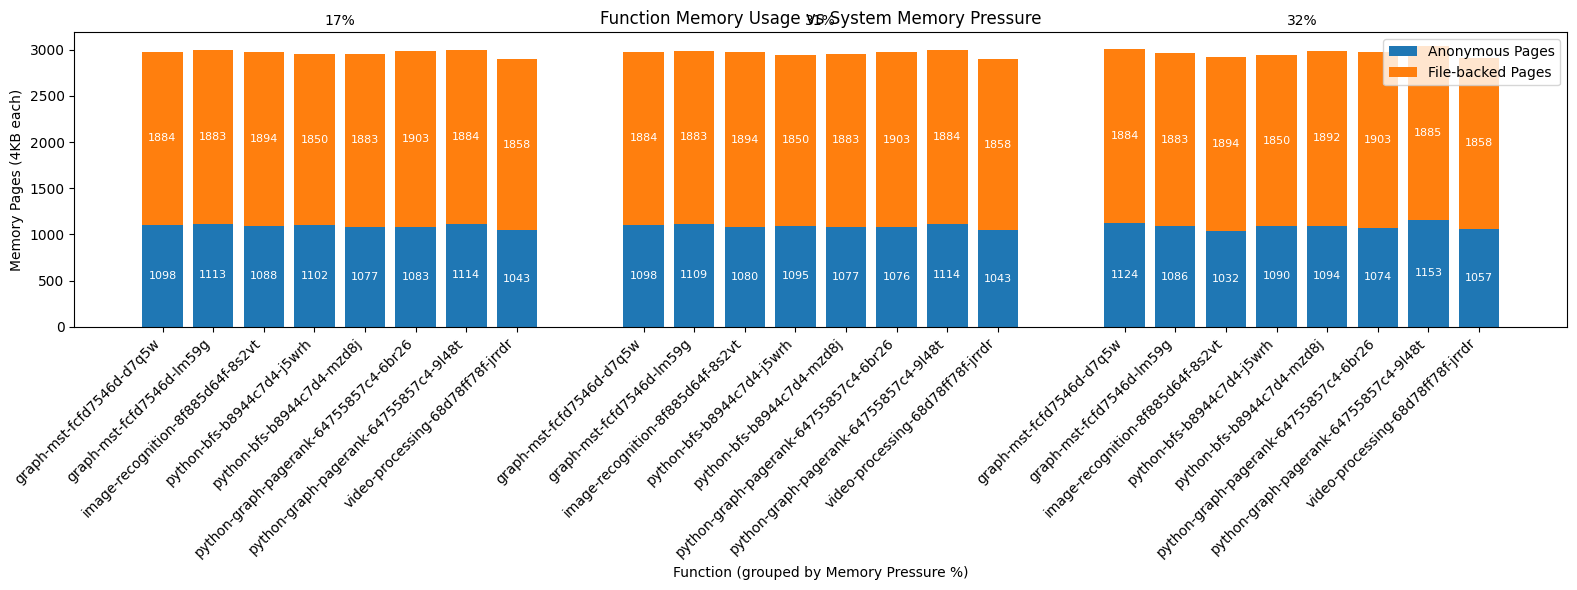

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
column_names = [
    "timestamp", "pod_name", "pid", "process_name",
    "anonymous_pages", "file_backed_pages", "memory_consumption_mb", "memory_pressure_percent"
]

df = pd.read_csv("function_memory_stats.csv", names=column_names, header=0, on_bad_lines='skip')

df["file_backed_pages"] = pd.to_numeric(df["file_backed_pages"], errors='coerce')
df["anonymous_pages"] = pd.to_numeric(df["anonymous_pages"], errors='coerce')
df["memory_pressure_percent"] = pd.to_numeric(df["memory_pressure_percent"], errors='coerce')
df.dropna(subset=["anonymous_pages", "file_backed_pages", "memory_pressure_percent"], inplace=True)

df["function"] = df["pod_name"].str.extract(r"^([a-zA-Z0-9\-]+)")

grouped = df.groupby("memory_pressure_percent")

# Plot settings
fig, ax = plt.subplots(figsize=(16, 6))
bar_width = 0.8
spacing = 1.5

x_ticks = []
x_labels = []
bar_index = 0

for pressure, group in grouped:
    group = group.reset_index()
    for i, row in group.iterrows():
        x = bar_index
        anon = row["anonymous_pages"]
        fileb = row["file_backed_pages"]
        function = row["function"]

        # Bars
        ax.bar(x, anon, color="#1f77b4", width=bar_width)
        ax.bar(x, fileb, bottom=anon, color="#ff7f0e", width=bar_width)

        # Labels
        ax.text(x, anon / 2, f"{int(anon)}", ha="center", va="center", color="white", fontsize=8)
        ax.text(x, anon + fileb / 2, f"{int(fileb)}", ha="center", va="center", color="white", fontsize=8)

        # X-tick label: function name under its bar
        x_ticks.append(x)
        x_labels.append(f"{function}")

        bar_index += 1

    bar_index += spacing

# Add memory pressure labels above groups
group_centers = []
bar_index = 0
for pressure, group in grouped:
    center = bar_index + (len(group) - 1) / 2
    group_centers.append(center)
    ax.text(center, ax.get_ylim()[1] + 50, f"{int(pressure)}%", ha='center', va='bottom', fontsize=10)
    bar_index += len(group) + spacing

# Final formatting
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Function (grouped by Memory Pressure %)")
ax.set_ylabel("Memory Pages (4KB each)")
ax.set_title("Function Memory Usage vs System Memory Pressure")
ax.legend(["Anonymous Pages", "File-backed Pages"])
plt.tight_layout()
plt.show()
